In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load data into tensorflow
    Step 1: Classify images into batchs
    Step 2: Train test split
    Step 3: Make layers

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=30

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Potato_Disease",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [22]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

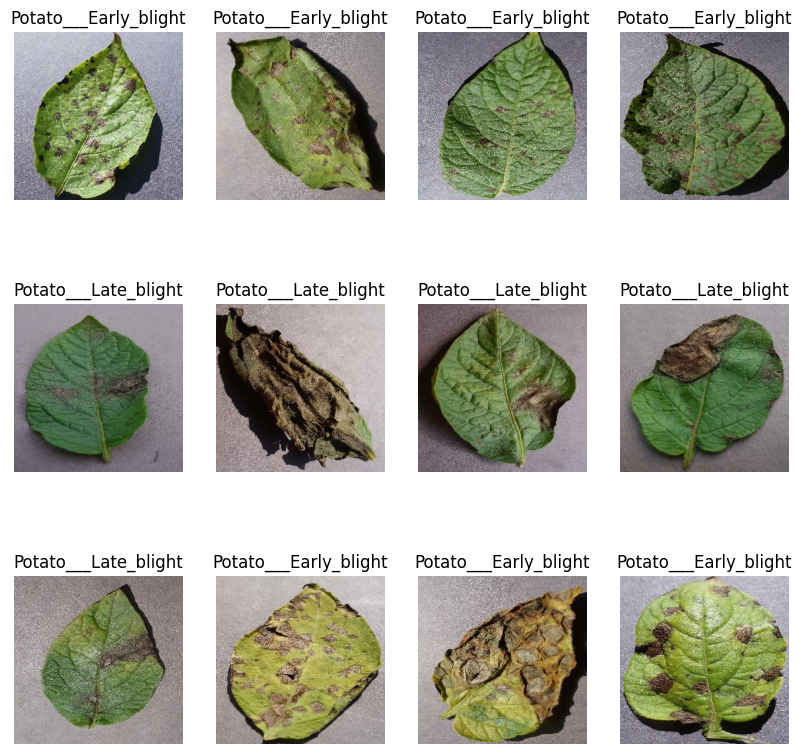

In [23]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])

In [24]:
#train_size=0.8
#train_ds=dataset.take(int(len(dataset)*train_size))
#len(train_ds)

In [25]:
#test_ds=dataset.skip(54)
#len(test_ds)

In [26]:
#val_size=0.1
#val_ds=test_ds.take(int((len(dataset)*val_size)))
#len(val_ds)

In [27]:
#test_ds=test_ds.skip(6)
#len(test_ds)

In [28]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1,test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size=len(dataset)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=5)
    
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)

    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return  train_ds, val_ds, test_ds

In [33]:
#get_dataset_partitions_tf(dataset)
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
len(train_ds)

54

In [34]:
len(val_ds)

6

In [35]:
len(test_ds)

8

In [36]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [31]:
resize_and_rescale=tf.keras.Sequential([
     layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
     layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [32]:
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
  layers.experimental.preprocessing.RandomRotation(0.2),

])

# Making model using CNN (Convolutional neural network)
    Step 1: Making model's layers
    Step 2: Make optimizer and loss function
    Step 3: Model.fit
    Step 4: Export the images with actual and predicted title

In [37]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax')
])
model.build(input_shape=input_shape)

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [39]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [49]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/30


54/54 [==============================] - 135s 3s/step - loss: 0.2045 - accuracy: 0.9243 - val_loss: 0.2068 - val_accuracy: 0.9323
Epoch 2/30
54/54 [==============================] - 131s 2s/step - loss: 0.1988 - accuracy: 0.9290 - val_loss: 0.1746 - val_accuracy: 0.9323
Epoch 3/30
54/54 [==============================] - 142s 3s/step - loss: 0.1399 - accuracy: 0.9442 - val_loss: 0.2790 - val_accuracy: 0.8958
Epoch 4/30
54/54 [==============================] - 133s 2s/step - loss: 0.1923 - accuracy: 0.9243 - val_loss: 0.1671 - val_accuracy: 0.9479
Epoch 5/30
54/54 [==============================] - 133s 2s/step - loss: 0.1543 - accuracy: 0.9384 - val_loss: 0.1543 - val_accuracy: 0.9479
Epoch 6/30
54/54 [==============================] - 128s 2s/step - loss: 0.1290 - accuracy: 0.9548 - val_loss: 0.3193 - val_accuracy: 0.8854
Epoch 7/30
54/54 [==============================] - 130s 2s/step - loss: 0.1656 - accuracy: 0.9384 - val_loss: 0.1182 - val_accuracy: 0.9479
Epoch 8/30
54/54 [======

In [50]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 5s 635ms/step - loss: 0.3302 - accuracy: 0.9102


In [51]:
history

In [52]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

In [53]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

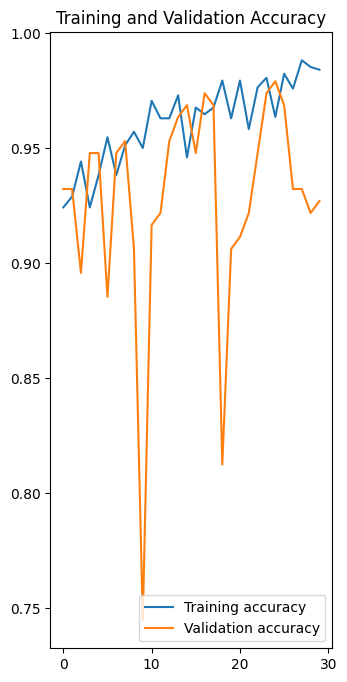

In [55]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

first image to predict:
actual lable:  Potato___Late_blight
1/1 [==============================] - 1s 574ms/step
predicted label:  Potato___Late_blight


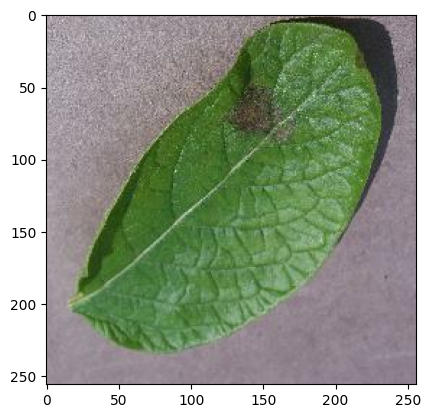

In [59]:
import numpy as np
for image_batch, label_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()

    print("first image to predict:")
    plt.imshow(first_image)
    
    print("actual lable: ",class_names[first_label])

    batch_predition=model.predict(image_batch)
    print("predicted label: ",class_names[np.argmax(batch_predition[0])])


In [68]:
def predict(model, img):
    img_array= tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_array=tf.expand_dims(img_array,0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*np.max(predictions[0]),2)

    return predicted_class, confidence

1/1 [==============================] - 0s 103ms/step


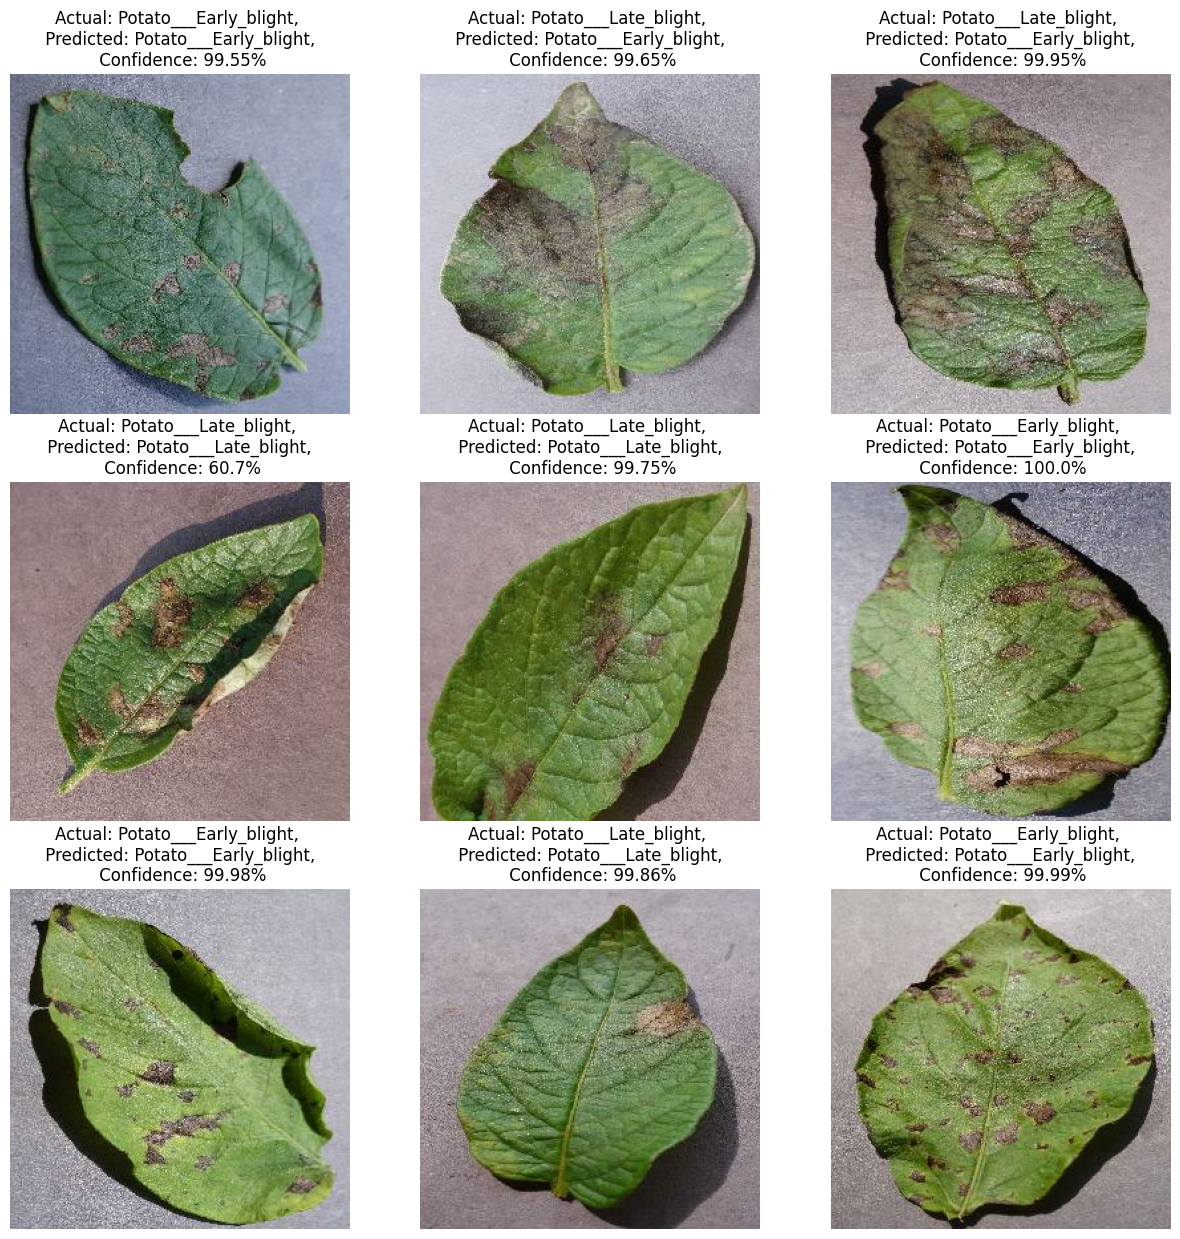

In [75]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range (9):
        ax=plt.subplot(3,3,i+1)
        
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence=predict(model,images[i])
        actual_class=class_names[labels[i]]
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}%" )
        #plt.title('Predicted label: ',class_names[predicted_class])
        plt.axis('off')

In [76]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
